In [1]:
# project on property prices II

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df3 = df2[~df2['location'].isnull()]

In [7]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df3.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df4 = df3[~df3['size'].isnull()]
df4.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df4.isnull().sum()

location       0
size           0
total_sqft     0
bath          57
price          0
dtype: int64

In [11]:
df4['bath'].fillna(df4['bath'].mean(), inplace=True)

C:\Users\GSPL - P8\AppData\Local\Temp\ipykernel_2904\2464066313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['bath'].fillna(df4['bath'].mean(), inplace=True)


In [12]:
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df4.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
df4.replace({
    "size" : '[A-Za-z]'
},"", regex=True, inplace=True)

C:\Users\GSPL - P8\AppData\Local\Temp\ipykernel_2904\3580374055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.replace({


In [15]:
df4.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [16]:
df4.rename(columns = {'size':'bhk'}, inplace = True)

C:\Users\GSPL - P8\AppData\Local\Temp\ipykernel_2904\3786958447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.rename(columns = {'size':'bhk'}, inplace = True)


In [17]:
type(df4['total_sqft'][0])

str

In [18]:
df4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def convert_to_float(x):
    split = x.split("-")
    if len(split) == 2:
        return (float(split[0]) + float(split[1]))/2
    else:
        try:
            return float(x)
        except:
            return 0

In [20]:
df4.total_sqft = df4.total_sqft.apply(convert_to_float)
df4.head()

C:\Users\GSPL - P8\AppData\Local\Temp\ipykernel_2904\788262611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.total_sqft = df4.total_sqft.apply(convert_to_float)


,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [21]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']

C:\Users\GSPL - P8\AppData\Local\Temp\ipykernel_2904\1051662690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']


In [22]:
df4.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [23]:
df4.isnull().sum()

location          0
bhk               0
total_sqft        0
bath              0
price             0
price_per_sqft    0
dtype: int64

In [24]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
df4.location = df4.location.str.strip()
df4.head()

C:\Users\GSPL - P8\AppData\Local\Temp\ipykernel_2904\890272498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.location = df4.location.str.strip()


,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [26]:
locations = df4.groupby('location')['location'].count().sort_values(ascending=False)

In [27]:
len(locations)

1293

In [28]:
locations[locations<=10]

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [29]:
locations[locations>10]

location
Whitefield          540
Sarjapur  Road      397
Electronic City     304
Kanakpura Road      273
Thanisandra         237
                   ... 
Marsur               11
Narayanapura         11
Thyagaraja Nagar     11
Nehru Nagar          11
LB Shastri Nagar     11
Name: location, Length: 241, dtype: int64

In [30]:
location_others = locations[locations<=10]
location_others

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [31]:
df5 = df4.copy()
df5.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [32]:
df5.location = df5.location.apply(lambda x: 'Others' if x in location_others else x)

In [33]:
len(df5.location.unique())

242

In [34]:
df5.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [35]:
df5['bhk'] = df5['bhk'].astype(float)

In [36]:
df5.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3.0,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00,6245.890861
4,Kothanur,2.0,1200.0,2.0,51.00,4250.000000


In [37]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]

In [38]:
df6.shape

(12513, 6)

In [39]:
df6.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3.0,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00,6245.890861
4,Kothanur,2.0,1200.0,2.0,51.00,4250.000000


In [40]:
df6.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
def removePPSOutliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df6.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = removePPSOutliers(df6)
df7.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4.0,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3.0,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3.0,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3.0,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2.0,1235.0,2.0,148.0,11983.805668


In [42]:
df8 = df7[(df7['bath'] < (df7['bhk'] + 2))]
df8.shape

(10192, 6)

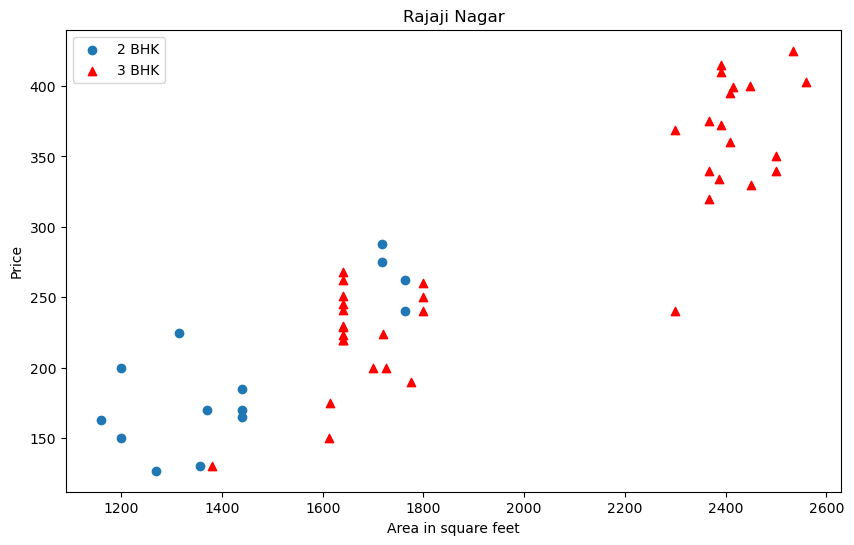

In [43]:
def plotScatterPlot(df, location):
    bhk_2 = df[(df['bhk'] == 2) & (df['location'] == location)]
    bhk_3 = df[(df['bhk'] == 3) & (df['location'] == location)]
    matplotlib.rcParams['figure.figsize'] = (10,6)
    plt.scatter(bhk_2['total_sqft'], bhk_2['price'], label="2 BHK")
    plt.scatter(bhk_3['total_sqft'], bhk_3['price'], marker = "^", color="red", label="3 BHK")
    plt.xlabel("Area in square feet")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plotScatterPlot(df8, "Rajaji Nagar")

In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0],
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df9 = remove_bhk_outliers(df8)
df9.shape

(7286, 6)

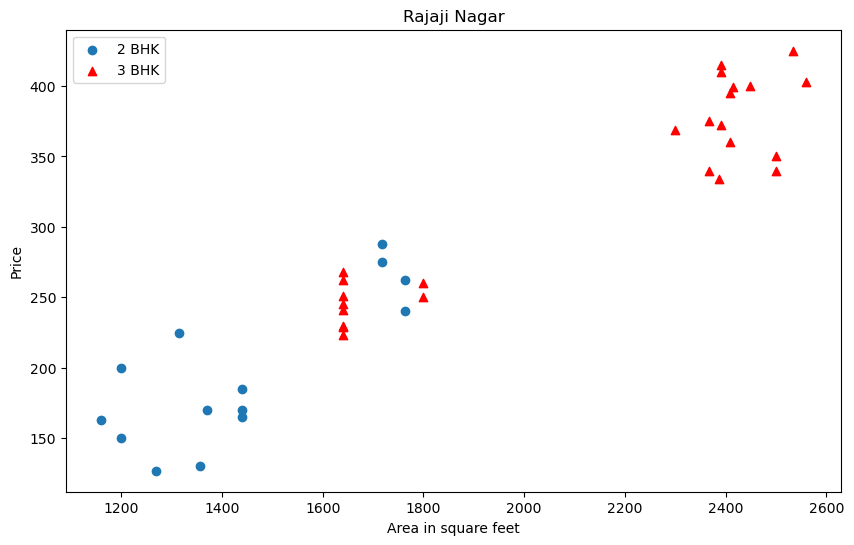

In [45]:
plotScatterPlot(df9, "Rajaji Nagar")

In [46]:
df9.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4.0,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3.0,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3.0,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3.0,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2.0,1235.0,2.0,148.0,11983.805668


In [47]:
df10 = df9.drop(['price_per_sqft'], axis='columns')
df10.head()

,location,bhk,total_sqft,bath,price
0,1st Block Jayanagar,4.0,2850.0,4.0,428.0
1,1st Block Jayanagar,3.0,1630.0,3.0,194.0
2,1st Block Jayanagar,3.0,1875.0,2.0,235.0
3,1st Block Jayanagar,3.0,1200.0,2.0,130.0
4,1st Block Jayanagar,2.0,1235.0,2.0,148.0


In [48]:
dummies = pd.get_dummies(df10.location)
dummies.drop('Others', axis='columns', inplace=True)

In [49]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
df11 = pd.concat([df10, dummies], axis="columns")
df11.head()

,location,bhk,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4.0,2850.0,4.0,428.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,3.0,1630.0,3.0,194.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,3.0,1875.0,2.0,235.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,3.0,1200.0,2.0,130.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,2.0,1235.0,2.0,148.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
inputs = df11.drop(['location', 'price'], axis='columns')
inputs.head()

,bhk,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,2850.0,4.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,1630.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3.0,1875.0,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.0,1200.0,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,1235.0,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
target = df11.price
target.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2,random_state=10)

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7900140399439514

In [55]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), inputs, target, cv=cv)

array([0.84279508, 0.86100762, 0.78369979, 0.87946956, 0.84523944])

In [56]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(inputs,target)

C:\Users\GSPL - P8\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\GSPL - P8\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\GSPL - P8\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\GSPL - P8\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\GSPL - P8\anaconda

,model,best_score,best_params
0,linear_regression,0.842781,{'fit_intercept': False}
1,lasso,0.698635,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.711438,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [64]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(inputs.columns==location)[0][0]

    x = np.zeros(len(inputs.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    print(x)

    return model.predict([x])[0]

In [58]:
predict_price('1st Phase JP Nagar',3, 1000, 3)

C:\Users\GSPL - P8\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.45152070856888

In [70]:
predict_price('Indira Nagar',2, 1000, 2)

[   2. 1000.    2.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   

C:\Users\GSPL - P8\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


179.33426792021606

In [75]:
predict_price('Vidyaranyapura',2, 200, 2)

[  2. 200.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

C:\Users\GSPL - P8\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-13.410252421688348

In [60]:
predict_price('Chikka Tirupathi',4, 2600, 5)

C:\Users\GSPL - P8\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


115.4572094137613

In [61]:
import pickle
with open('D:\\Python\\banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [62]:
import json
columns = {
    'data_columns' : [col.lower() for col in inputs.columns]
}
with open("D:\\Python\\columns.json","w") as f:
    f.write(json.dumps(columns))